In [1]:
%pylab notebook
plt.ion()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from iminuit import Minuit

In [3]:
datalow=np.genfromtxt('lowC', missing_values='nan')
datahigh=np.genfromtxt('highC', missing_values='nan')

<IPython.core.display.Javascript object>


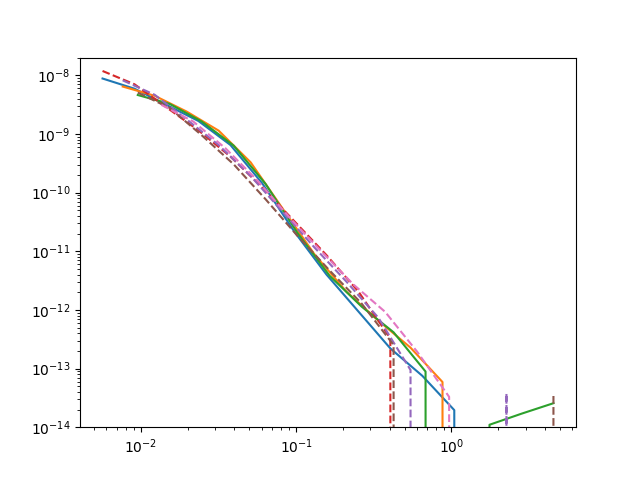

(1e-14, 2e-08)

In [4]:
plt.figure()
plt.loglog(datalow[::2,:][1:4].T,datalow[1::2,:][1:4].T)
plt.loglog(datahigh[1:5].T, datahigh[6:].T, '--')
plt.ylim([1e-14, 2e-8])

In [43]:
def double_pl(x, A, r0, a, b):
    r0=10**r0
    return 10**A*(1+(x/r0)**-a)/(1+(x/r0)**b)
def triple_pl(x, A, r0, a, b, r1, c):
    return double_pl(x, A, r0, a, b)/(1+(x/10**r1)**c)
def log_sersic(x, k, n, A):
    return A-k*x**(1./n)
def chi2_func(x,y, k, n, A):
    chi2=np.sum((np.log(y)-log_sersic(x, k, n, A))**2)
    return chi2
def likefunc_high(k, n, A):
    x=datahigh[1:5].ravel()
    y=datahigh[6:].ravel()
    sel=y>1e-13
    return chi2_func(x[sel], y[sel], k, n, A)
def likefunc_low(k, n, A):
    x=datalow[::2][1:4].ravel()
    y=datalow[1::2][1:4].ravel()
    sel=y>1e-13
    return chi2_func(x[sel], y[sel], k, n, A)
def likefunc_low_pl(A, r0, a, b):
    x=datalow[::2][1:4].ravel()
    y=datalow[1::2][1:4].ravel()
    sel=y>1e-13
    ypred=double_pl(x[sel], A, r0, a, b)
    return np.sum((np.log(y)[sel]-np.log(ypred))**2)
def likefunc_high_pl(A, r0, a, b):
    x=datahigh[1:5].ravel()
    y=datahigh[6:].ravel()
    sel=y>1e-13
    ypred=double_pl(x[sel], A, r0, a, b)
    return np.sum((np.log(y)[sel]-np.log(ypred))**2)
def likefunc_low_pl3(A, r0, a, b, r1, c):
    x=datalow[::2][1:4].ravel()
    y=datalow[1::2][1:4].ravel()
    sel=y>1e-13
    ypred=triple_pl(x[sel], A, r0, a, b, r1, c)
    return np.sum((np.log(y)[sel]-np.log(ypred))**2)

<IPython.core.display.Javascript object>


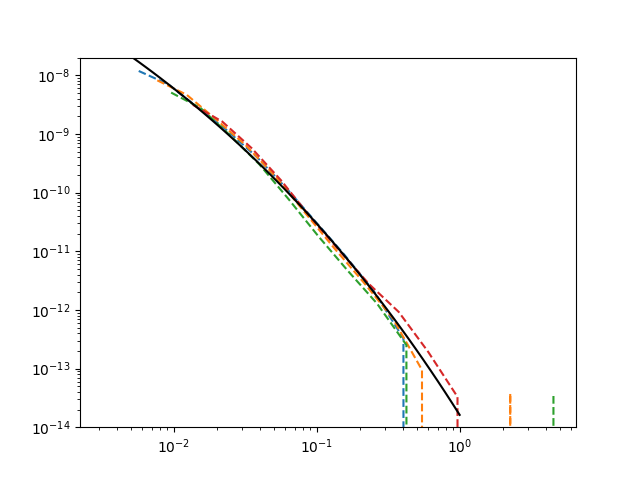

In [7]:
m=Minuit(likefunc_high, A=np.log(1e-8), k=1, n=1)
result=m.migrad()
pfit_high=[m.values[p] for p in m.parameters]

plt.figure()
plt.loglog(datahigh[1:5].T, datahigh[6:].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, np.exp(log_sersic(r, *pfit_high)), 'k')

<IPython.core.display.Javascript object>


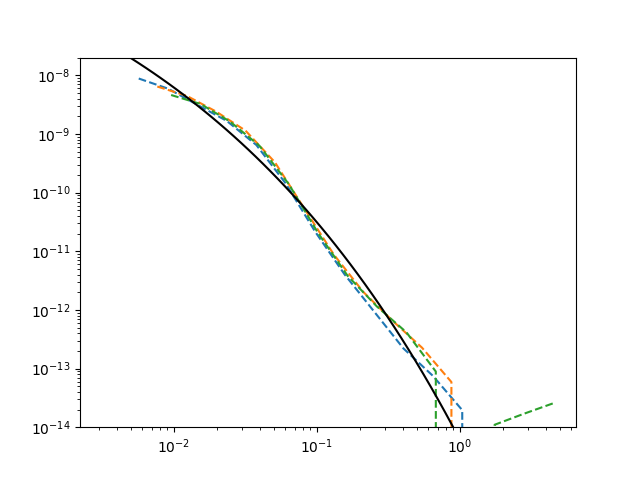

In [9]:
m=Minuit(likefunc_low, A=-6, k=20, n=5)
result=m.migrad()
pfit_low=[m.values[p] for p in m.parameters]

plt.figure()
plt.loglog(datalow[::2][1:4].T, datalow[1::2][1:4].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, np.exp(log_sersic(r, *pfit_low)), 'k')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter r0 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/us

FCN = 1.75268009212 
 TOTAL NCALL = 135 
 NCALLS = 135 
 
 
 EDM = 2.4279064129e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,A,-8.84794,0.533511,0,0,,,
2,r0,-1.58369,0.232228,0,0,,,
3,a,1.07966,0.966644,0,0,,,
4,b,3.10414,0.276833,0,0,,,


<IPython.core.display.Javascript object>


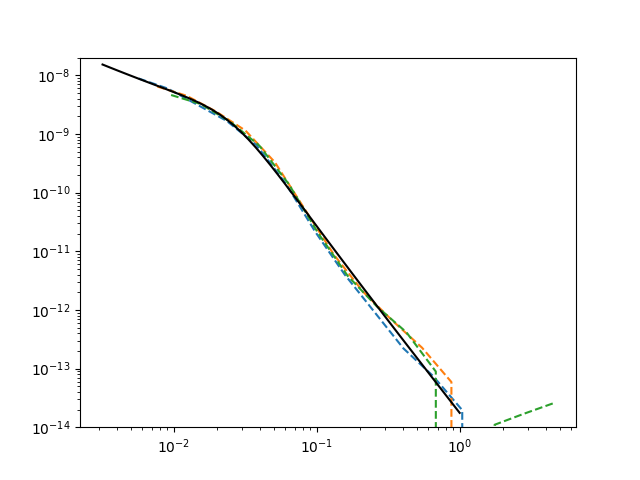

In [32]:
m=Minuit(likefunc_low_pl, r0=-1.5, a=1.2, b=2, A=-9)
result=m.migrad()
pfit=[m.values[p] for p in m.parameters]

plt.figure()
plt.loglog(datalow[::2][1:4].T, datalow[1::2][1:4].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, double_pl(r, *pfit), 'k')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter r0 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/us

FCN = 1.75268476532 
 TOTAL NCALL = 439 
 NCALLS = 439 
 
 
 EDM = 7.08255073486e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,A,-8.54732,0.534176,0,0,,,
2,r0,-1.58351,0.232451,0,0,,,
3,a,1.07985,0.967572,0,0,,,
4,b,3.10443,0.277168,0,0,,,
5,r1,-0.999993,0.549742,0,0,-1.0,0.0,
6,c,3.11574e-05,2.86171,0,0,0.0,3.0,


<IPython.core.display.Javascript object>


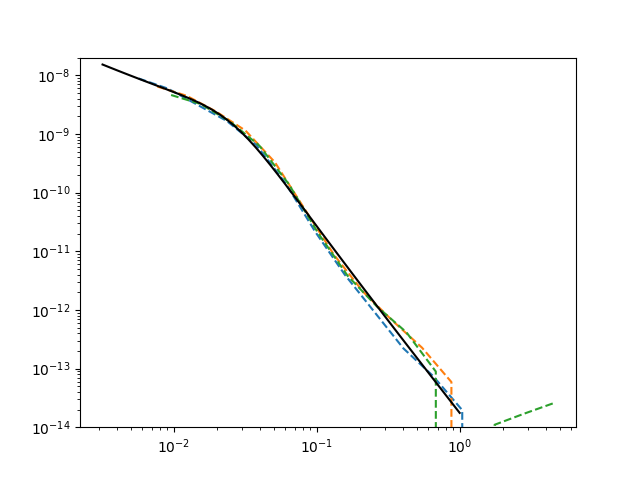

In [47]:
#triple power law is not needed. no better than double.
m=Minuit(likefunc_low_pl3, r0=-1.5, a=1.2, b=2, A=-9, r1=-1, c=1.8, limit_c=[0, 3], limit_r1=[-1, 0])
result=m.migrad()
pfit=[m.values[p] for p in m.parameters]

plt.figure()
plt.loglog(datalow[::2][1:4].T, datalow[1::2][1:4].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, triple_pl(r, *pfit), 'k')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter r0 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/us

FCN = 1.24536726717 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 4.72371366583e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,A,-9.04466,0.934422,0,0,,,
2,r0,-1.56208,0.394352,0,0,,,
3,a,1.64156,0.955638,0,0,,,
4,b,2.81763,0.268143,0,0,,,


<IPython.core.display.Javascript object>


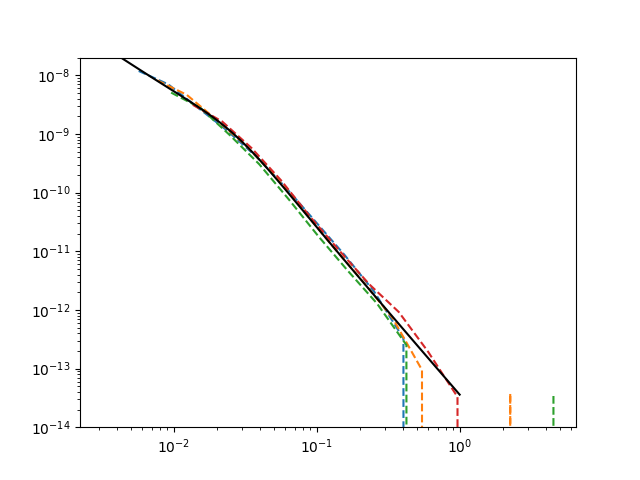

In [38]:
m=Minuit(likefunc_high_pl, r0=-1.5, a=1, b=2, A=-9)
result=m.migrad()
pfit_high=[m.values[p] for p in m.parameters]

plt.figure()
plt.loglog(datahigh[1:5].T, datahigh[6:].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, double_pl(r, *pfit_high), 'k')